# Regularisation, Parameter Initialisation, Batchnorm, Optimisers

Create and compare different models (as described below).

Inspect the results by using tensorboard.


In [4]:
import tensorflow as tf
import datetime
import os

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Parameters


In [6]:
layersizes = [50,50,50,10]
batchsize = 32 
epochs = 20
learning_rate = 0.1

tensorboard_folder = "tb_logs_keras"
outdir = os.path.join(os.getcwd(), tensorboard_folder)

### Baseline Model

* No regularisation
* No Batch Norm
* Default parameter initialisation of Keras: What is the default?
* Sigmoid activation (last layer always softmax)
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Now, create the baseline model. 

Possibly, add convenient naming to the layers so that you can more easily read the outputs in tensorboard. 

In [18]:
def baseline_model(layersizes, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    activation -- string specifying the activation function for the hidden layers to be used.
    
    """
    ### START YOUR CODE HERE ###

    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    for i in range(3):
        layers.append(tf.keras.layers.Dense(layersizes[i], activation = activation, name = "hidden%s"%(i+1)))
    layers.append(tf.keras.layers.Dense(layersizes[-1], activation = 'softmax', name = "output")) #last layer Softmax
    
    model = tf.keras.models.Sequential(layers) #MLP model using Sequential
     
    
    ### STOP YOUR CODE HERE ###

    return model

#### Run model

Use cross entropy as loss function.

In [29]:
run_name = "baseline"
rundir = os.path.join(outdir, run_name)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=rundir, histogram_freq=1, profile_batch=0)
# start tensorboard on command line with tensorboard -logs <path to outdir> 


### START YOUR CODE HERE ###

model = baseline_model(layersizes, 'sigmoid')
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
log = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize, validation_data=(x_test,y_test),
                  callbacks=[tensorboard_callback])


### STOP YOUR CODE HERE ###


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1086 - accuracy: 0.2324 - val_loss: 0.7525 - val_accuracy: 0.7895
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6389 - accuracy: 0.8163 - val_loss: 0.3903 - val_accuracy: 0.8947
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8962 - val_loss: 0.2874 - val_accuracy: 0.9193
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2762 - accuracy: 0.9221 - val_loss: 0.2248 - val_accuracy: 0.9372
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2168 - accuracy: 0.9372 - val_loss: 0.1869 - val_accuracy: 0.9479
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1811 - accuracy: 0.9476 - val_loss: 0.1781 - val_accuracy: 0.9495
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1537 - accuracy: 0.9555 - val_loss: 0.1542 - val_accuracy:

#### OUTPUTs

Provide here suitable plots and comments:

* Learning curves: train / test accuracy and loss


<ipython-input-36-9721d0b420fb>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


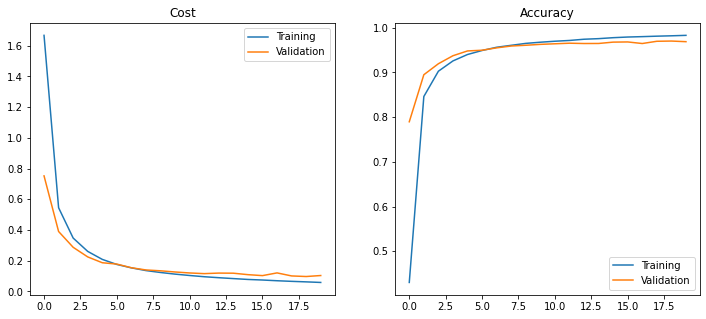

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1)
ax.set_title('Cost')
ax.plot(log.history['loss'], label='Training')
ax.plot(log.history['val_loss'], label='Validation')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.set_title('Accuracy')
ax.plot(log.history['accuracy'], label='Training')
ax.plot(log.history['val_accuracy'], label='Validation')
ax.legend()

fig.show()

### Parameter Initialisation

* No regularisation
* No Batch Norm
* __Parameter Initialisation: Compare GlorotNormal, Random Normal (mean 0, stdev 1), Zero, HeNormal__
* __Sigmoid Activation (last layer always softmax): Compare Sigmoid, ReLu__
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Hence, for each of the 4 initializers train and test a model sigmoid and relu.

In [ ]:
def model_param_init(layersizes, initializer, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    initializer -- weight initializer
    activation -- string specifying the activation function to be used.
    
    """
    ### START YOUR CODE HERE ###    
    
    
    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    for i in range(3):
        layers.append(tf.keras.layers.Dense(layersizes[i], kernel_initializer = initializer, activation = activation, name = "hidden%s"%(i+1)))
    layers.append(tf.keras.layers.Dense(layersizes[-1], kernel_initializer = initializer, activation = 'softmax', name = "output")) #last layer Softmax

    model = tf.keras.models.Sequential(layers) #MLP model using Sequential
    
    
    ### STOP YOUR CODE HERE ###

    return model

#### Run model

Run with the different settings.
Don't forget to configure the proper tensorboard callback.

In [103]:
metrics = []

for initializer in ["glorot_normal", "random_normal", "zero", "he_normal"]:
  for activation_function in ['sigmoid', 'relu']:
    print(initializer, activation_function)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model = model_param_init(layersizes, initializer=initializer,activation = activation_function)
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    log = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize, validation_data=(x_test,y_test))

    metrics.append([log.history['loss'], log.history['val_loss'], log.history['accuracy'], log.history['val_accuracy']])


    

glorot_normal sigmoid
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1927 - accuracy: 0.1853 - val_loss: 0.9229 - val_accuracy: 0.7293
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7471 - accuracy: 0.7753 - val_loss: 0.4621 - val_accuracy: 0.8771
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4335 - accuracy: 0.8826 - val_loss: 0.3300 - val_accuracy: 0.9098
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.9157 - val_loss: 0.2705 - val_accuracy: 0.9234
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9337 - val_loss: 0.2101 - val_accuracy: 0.9409
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1958 - accuracy: 0.9445 - val_loss: 0.1832 - val_accuracy: 0.9478
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1690 - accuracy: 0.9523 - val_loss: 

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9697 - val_loss: 0.1492 - val_accuracy: 0.9584
Epoch 18/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0988 - accuracy: 0.9723 - val_loss: 0.1439 - val_accuracy: 0.9589
Epoch 19/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9722 - val_loss: 0.1349 - val_accuracy: 0.9615
Epoch 20/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.1354 - val_accuracy: 0.9617
random_normal relu
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3060 - accuracy: 0.5277 - val_loss: 0.2118 - val_accuracy: 0.9345
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1844 - accuracy: 0.9449 - val_loss: 0.1533 - val_accuracy: 0.9510
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1307 - accuracy: 0.9592 - val_loss: 0.1336 - va

1875/1875 [==============================] - 3s 2ms/step - loss: 2.3021 - accuracy: 0.1097 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 14/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.1111 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 15/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3019 - accuracy: 0.1134 - val_loss: 2.3015 - val_accuracy: 0.1010
Epoch 16/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - accuracy: 0.1095 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 17/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.1106 - val_loss: 2.3032 - val_accuracy: 0.1010
Epoch 18/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3021 - accuracy: 0.1109 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 19/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3019 - accuracy: 0.1101 - val_loss: 2.3014 - val_accuracy: 0.11



| Activation\Initializer | Glorot Normal | Random Normal | Zero | He_Normal |
| --- | --- | --- | --- | --- |
| Sigmoid | .9669 | .9617 | .4118 | .9700 |
| Relu | .9738 | .9765 | .1135 | .9757 |


#### OUTPUTs

Provide here suitable plots and comments:

* Comparison of the different learning curves: 
    * train accuracy vs epochs for different models
    * train loss vs epochs for different models
    * test accuracy vs epochs for different models
    * test loss vs epochs for different models
    
Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of parameter initialisation become more clear?

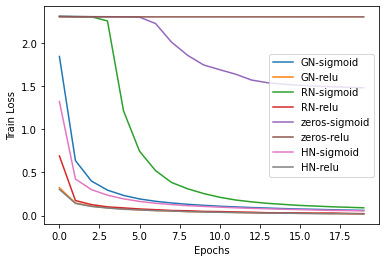

In [121]:
len(metrics) # row, 8 different models: glorotnormal-sigmoid, glorotnormal-relu, randomnormal-sigmoid, randomnormal-relu...
len(metrics[0]) #column, 4 type of measurement, loss, var loss, accuracy, var accuracy
metrics[0][0] #train loss of glorotnormal-sigmoid
metrics[0][1] #test loss of glorotnormal-sigmoid
metrics[0][2] #train accuracy of glorotnormal-sigmoid
metrics[0][3] #test accuracay of glorotnormal-sigmoid


plt.plot(metrics[0][0], label='GN-sigmoid')
plt.plot(metrics[1][0], label='GN-relu')
plt.plot(metrics[2][0], label='RN-sigmoid')
plt.plot(metrics[3][0], label='RN-relu')
plt.plot(metrics[4][0], label='zeros-sigmoid')
plt.plot(metrics[5][0], label='zeros-relu')
plt.plot(metrics[6][0], label='HN-sigmoid')
plt.plot(metrics[7][0], label='HN-relu')
plt.ylabel("Train Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

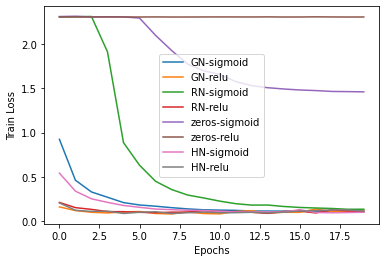

In [123]:
plt.plot(metrics[0][1], label='GN-sigmoid')
plt.plot(metrics[1][1], label='GN-relu')
plt.plot(metrics[2][1], label='RN-sigmoid')
plt.plot(metrics[3][1], label='RN-relu')
plt.plot(metrics[4][1], label='zeros-sigmoid')
plt.plot(metrics[5][1], label='zeros-relu')
plt.plot(metrics[6][1], label='HN-sigmoid')
plt.plot(metrics[7][1], label='HN-relu')
plt.ylabel("Test Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

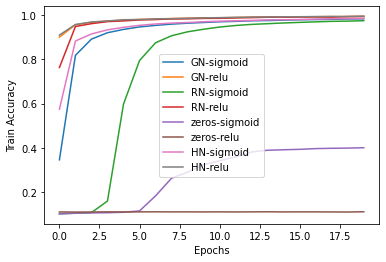

In [124]:
plt.plot(metrics[0][2], label='GN-sigmoid')
plt.plot(metrics[1][2], label='GN-relu')
plt.plot(metrics[2][2], label='RN-sigmoid')
plt.plot(metrics[3][2], label='RN-relu')
plt.plot(metrics[4][2], label='zeros-sigmoid')
plt.plot(metrics[5][2], label='zeros-relu')
plt.plot(metrics[6][2], label='HN-sigmoid')
plt.plot(metrics[7][2], label='HN-relu')
plt.ylabel("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

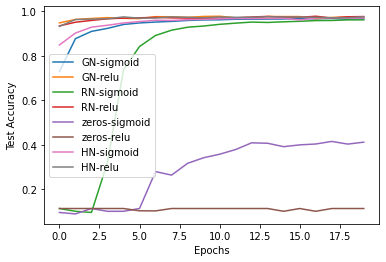

In [125]:
plt.plot(metrics[0][3], label='GN-sigmoid')
plt.plot(metrics[1][3], label='GN-relu')
plt.plot(metrics[2][3], label='RN-sigmoid')
plt.plot(metrics[3][3], label='RN-relu')
plt.plot(metrics[4][3], label='zeros-sigmoid')
plt.plot(metrics[5][3], label='zeros-relu')
plt.plot(metrics[6][3], label='HN-sigmoid')
plt.plot(metrics[7][3], label='HN-relu')
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Batch Normalisation

* No regularisation
* __Batch Norm__: with / without 
* __Parameter Initialisation: Random Normal (0,1), GlorotNormal__
* __Activation: Compare Sigmoid, ReLu__
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Run with/without batchnorm in combination with sigmoid or relu (with GlorotNormal).<br>
Run with/without batchnorm in combination with GlorotNormal or RandomNormal (with sigmoid).<br>
Hence run 8 different models.

In [130]:
def model_batchnorm(layersizes, initializer, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    initializer -- weight initializer
    activation -- string specifying the activation function to be used.
    """
    ### START YOUR CODE HERE ###

    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    for i in range(3):
        layers.append(tf.keras.layers.Dense(layersizes[i], kernel_initializer = initializer, activation = activation, name = "hidden%s"%(i+1)))
    layers.append(tf.keras.layers.Dense(layersizes[-1], kernel_initializer = initializer, activation = 'softmax', name = "output")) #last layer Softmax

    model = tf.keras.models.Sequential(layers) #MLP model using Sequential
    
    ### STOP YOUR CODE HERE ###

    return model


In [132]:
def model_wbatchnorm(layersizes, initializer, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    initializer -- weight initializer
    activation -- string specifying the activation function to be used.
    """
    ### START YOUR CODE HERE ###

    layers = []
    layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
    for i in range(3):
        layers.append(tf.keras.layers.Dense(layersizes[0], kernel_initializer = initializer, activation = activation, name = "hidden%s"%(i+1)))
        layers.append(BatchNormalization())
    layers.append(tf.keras.layers.Dense(layersizes[-1], kernel_initializer = initializer, activation = 'softmax', name = "output")) #last layer Softmax

    model = tf.keras.models.Sequential(layers) #MLP model using Sequential
    
    ### STOP YOUR CODE HERE ###

    return model

#### Run model

Run the different variants.

In [134]:
### START YOUR CODE HERE ###
from keras.layers import BatchNormalization
metrics = []

for initializer in ["glorot_normal", "random_normal"]:
  for activation_function in ['sigmoid', 'relu']:
    print(initializer, activation_function)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model = model_batchnorm(layersizes, initializer=initializer,activation = activation_function)
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    log = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize, validation_data=(x_test,y_test))

    metrics.append([log.history['loss'], log.history['val_loss'], log.history['accuracy'], log.history['val_accuracy']])


for initializer in ["glorot_normal", "random_normal"]:
  for activation_function in ['sigmoid', 'relu']:
    print(initializer, activation_function)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model = model_wbatchnorm(layersizes, initializer=initializer,activation = activation_function)
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    log = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize, validation_data=(x_test,y_test))

    metrics.append([log.history['loss'], log.history['val_loss'], log.history['accuracy'], log.history['val_accuracy']])



### STOP YOUR CODE HERE ###

glorot_normal sigmoid
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1425 - accuracy: 0.2037 - val_loss: 1.0072 - val_accuracy: 0.6805
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7982 - accuracy: 0.7670 - val_loss: 0.4373 - val_accuracy: 0.8825
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4120 - accuracy: 0.8873 - val_loss: 0.3142 - val_accuracy: 0.9143
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.9182 - val_loss: 0.2467 - val_accuracy: 0.9312
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2271 - accuracy: 0.9356 - val_loss: 0.2062 - val_accuracy: 0.9423
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1860 - accuracy: 0.9474 - val_loss: 0.1842 - val_accuracy: 0.9474
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1591 - accuracy: 0.9540 - val_loss: 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9659 - val_loss: 0.1566 - val_accuracy: 0.9569
Epoch 18/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1086 - accuracy: 0.9699 - val_loss: 0.1617 - val_accuracy: 0.9555
Epoch 19/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0993 - accuracy: 0.9716 - val_loss: 0.1589 - val_accuracy: 0.9555
Epoch 20/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0941 - accuracy: 0.9740 - val_loss: 0.1508 - val_accuracy: 0.9578
random_normal relu
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3132 - accuracy: 0.5374 - val_loss: 0.1895 - val_accuracy: 0.9417
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1744 - accuracy: 0.9470 - val_loss: 0.1477 - val_accuracy: 0.9535
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9614 - val_loss: 0.1243 - va

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.0774 - val_accuracy: 0.9770
Epoch 14/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 15/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9802 - val_loss: 0.0757 - val_accuracy: 0.9777
Epoch 16/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 17/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9823 - val_loss: 0.0834 - val_accuracy: 0.9747
Epoch 18/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9828 - val_loss: 0.0825 - val_accuracy: 0.9772
Epoch 19/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9844 - val_loss: 0.0803 - val_accuracy: 0.97

#### OUTPUTs

Provide here suitable plots and comments:

* Comparison of the different learning curves: 
    * train accuracy vs epochs for different models
    * train loss vs epochs for different models
    * test accuracy vs epochs for different models
    * test loss vs epochs for different models
    
* Inspect the histograms of the activations and compare them for the different models.

* Find the max learning rate for the model with and without Batch Norm. 

Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of batch norm become more clear?

In [ ]:
len(metrics) 
# row, 8 different models: glorotnormal-sigmoid-noBatchNorm, glorotnormal-relu-noBatchNorm, 
#randomnormal-sigmoid-noBatchNorm, randomnormal-relu-noBatchNorm, glorotnormal-sigmoid-BatchNorm, 
#glorotnormal-relu-BatchNorm, randomnormal-sigmoid-BatchNorm, randomnormal-relu-BatchNorm
len(metrics[0]) #column, 4 type of measurement, loss, var loss, accuracy, var accuracy
metrics[0][0] #train loss of glorotnormal-sigmoid
metrics[0][1] #test loss of glorotnormal-sigmoid
metrics[0][2] #train accuracy of glorotnormal-sigmoid
metrics[0][3] #test accuracay of glorotnormal-sigmoid

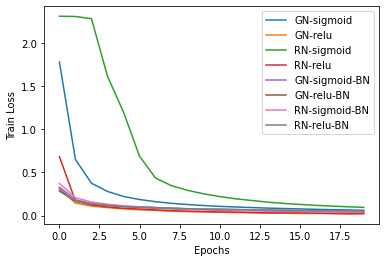

In [136]:
plt.plot(metrics[0][0], label='GN-sigmoid')
plt.plot(metrics[1][0], label='GN-relu')
plt.plot(metrics[2][0], label='RN-sigmoid')
plt.plot(metrics[3][0], label='RN-relu')
plt.plot(metrics[4][0], label='GN-sigmoid-BN')
plt.plot(metrics[5][0], label='GN-relu-BN')
plt.plot(metrics[6][0], label='RN-sigmoid-BN')
plt.plot(metrics[7][0], label='RN-relu-BN')
plt.ylabel("Train Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

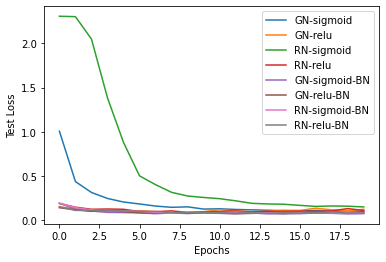

In [137]:
plt.plot(metrics[0][1], label='GN-sigmoid')
plt.plot(metrics[1][1], label='GN-relu')
plt.plot(metrics[2][1], label='RN-sigmoid')
plt.plot(metrics[3][1], label='RN-relu')
plt.plot(metrics[4][1], label='GN-sigmoid-BN')
plt.plot(metrics[5][1], label='GN-relu-BN')
plt.plot(metrics[6][1], label='RN-sigmoid-BN')
plt.plot(metrics[7][1], label='RN-relu-BN')
plt.ylabel("Test Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

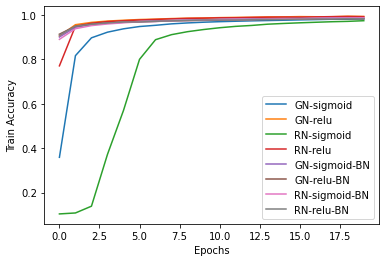

In [138]:
plt.plot(metrics[0][2], label='GN-sigmoid')
plt.plot(metrics[1][2], label='GN-relu')
plt.plot(metrics[2][2], label='RN-sigmoid')
plt.plot(metrics[3][2], label='RN-relu')
plt.plot(metrics[4][2], label='GN-sigmoid-BN')
plt.plot(metrics[5][2], label='GN-relu-BN')
plt.plot(metrics[6][2], label='RN-sigmoid-BN')
plt.plot(metrics[7][2], label='RN-relu-BN')
plt.ylabel("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

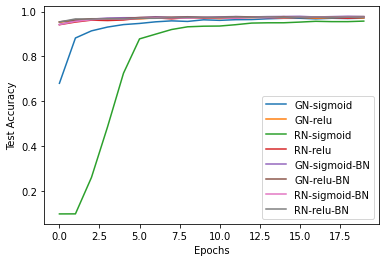

In [139]:
plt.plot(metrics[0][3], label='GN-sigmoid')
plt.plot(metrics[1][3], label='GN-relu')
plt.plot(metrics[2][3], label='RN-sigmoid')
plt.plot(metrics[3][3], label='RN-relu')
plt.plot(metrics[4][3], label='GN-sigmoid-BN')
plt.plot(metrics[5][3], label='GN-relu-BN')
plt.plot(metrics[6][3], label='RN-sigmoid-BN')
plt.plot(metrics[7][3], label='RN-relu-BN')
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Optimizers

* No regularisation
* No BatchNorm 
* Parameter Initialisation: GlorotNormal
* Activation: ReLu
* Optimizers: Compare 
    * SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop)
    * RmsProp
    * Momentum

Create an according model and train it with the different optimizers.

In [147]:
layers = []
layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
for i in range(3):
    layers.append(tf.keras.layers.Dense(layersizes[i], kernel_initializer = 'glorot_normal', activation = 'relu', name = "hidden%s"%(i+1)))
layers.append(tf.keras.layers.Dense(layersizes[-1], kernel_initializer = 'glorot_normal', activation = 'softmax', name = "output")) #last layer Softmax

model = tf.keras.models.Sequential(layers) #MLP model using Sequential
 
learning_rate = 0.1
optimizers = {"sgd" : tf.optimizers.SGD(learning_rate = learning_rate),
             "rmsprop" : tf.optimizers.RMSprop(learning_rate = learning_rate*0.1),
             "momentum" : tf.optimizers.SGD(learning_rate = learning_rate*0.1, momentum=0.9, nesterov=True)}

metrics = []
for name, optimizer in optimizers.items():
    print(optimizer)
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    log = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batchsize, validation_data=(x_test,y_test),
                   callbacks=[tensorboard_callback])
    metrics.append([log.history['loss'], log.history['val_loss'], log.history['accuracy'], log.history['val_accuracy']])



Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5808 - accuracy: 0.8148 - val_loss: 0.1582 - val_accuracy: 0.9512
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1505 - accuracy: 0.9544 - val_loss: 0.1382 - val_accuracy: 0.9558
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1112 - accuracy: 0.9660 - val_loss: 0.1296 - val_accuracy: 0.9608
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9718 - val_loss: 0.1819 - val_accuracy: 0.9465
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0981 - val_accuracy: 0.9716
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0994 - val_accuracy:

Epoch 16/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3022 - accuracy: 0.1094 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 17/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.1121 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 18/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3022 - accuracy: 0.1078 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 19/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3014 - val_accuracy: 0.1032
Epoch 20/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3021 - accuracy: 0.1095 - val_loss: 2.3015 - val_accuracy: 0.1135


#### OUTPUTs

TODO: 
* Comparison of the different learning curves: 
    * train accuracy vs epochs for optimizers
    * train loss vs epochs for optimizers
    * test accuracy vs epochs for optimizers
    * test loss vs epochs for optimizers
    
Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of the different optimizers become more clear?

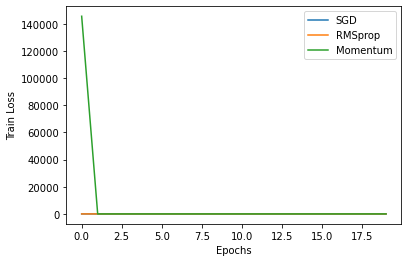

In [148]:
plt.plot(metrics[0][0], label='SGD')
plt.plot(metrics[1][0], label='RMSprop')
plt.plot(metrics[2][0], label='Momentum')
plt.ylabel("Train Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

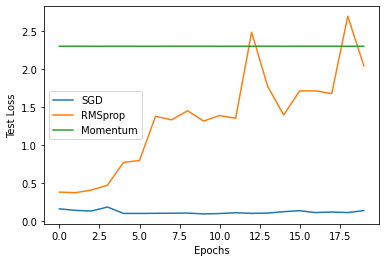

In [149]:
plt.plot(metrics[0][1], label='SGD')
plt.plot(metrics[1][1], label='RMSprop')
plt.plot(metrics[2][1], label='Momentum')
plt.ylabel("Test Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

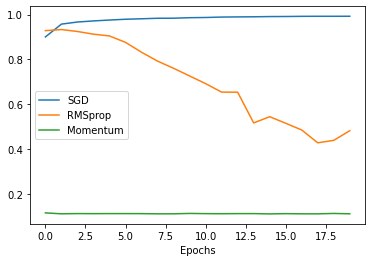

In [150]:
plt.plot(metrics[0][2], label='SGD')
plt.plot(metrics[1][2], label='RMSprop')
plt.plot(metrics[2][2], label='Momentum')
plt.xlabel("Epochs")
plt.legend()
plt.show()

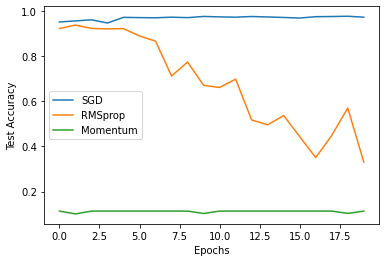

In [151]:
plt.plot(metrics[0][3], label='SGD')
plt.plot(metrics[1][3], label='RMSprop')
plt.plot(metrics[2][3], label='Momentum')
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()